# **Data Preparation**

# **Data Understanding**
### Dataset : **StudentsPerformance.csv**
This data set consists of the marks secured by the students in various subjects.


  - Data Cleaning
  - Data Scaling
  - Dealing with an Imbalance Dataset

---

**Import Libraries** and **Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')

**Data Understanding**

In [ ]:
df.columns.values

array(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test_preparation_course', 'math score', 'reading score',
       'writing score'], dtype=object)

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test_preparation_course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test_preparation_course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


---

# Data Cleaning

**Handling Irrelevant Data**

In [ ]:
df = df.drop(['race/ethnicity','parental level of education','lunch'], axis=1)

↑ Menghapus kolom race/ethnicity, parental level of education, dan lunch karena data tersebut tidak ada relevansi dengan problem yang akan dianalisa

In [ ]:
for col in df.columns:
    uniq=df[col].unique().tolist()
    print(f'num of unique values of {col} colomn is:  {len(uniq)}')

num of unique values of gender colomn is:  2
num of unique values of test_preparation_course colomn is:  2
num of unique values of math score colomn is:  81
num of unique values of reading score colomn is:  72
num of unique values of writing score colomn is:  77


↑ Mencari jumlah unique value per kolom dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   object
 1   test_preparation_course  1000 non-null   object
 2   math score               1000 non-null   int64 
 3   reading score            1000 non-null   int64 
 4   writing score            1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [ ]:
df.shape

(1000, 5)

In [ ]:
df.columns

Index(['gender', 'test_preparation_course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

**Handling Missing Values**

In [ ]:
df.isnull().sum()

gender                     0
test_preparation_course    0
math score                 0
reading score              0
writing score              0
dtype: int64

↑ Mengecek apakah ada missing value

**Handling Outliers**

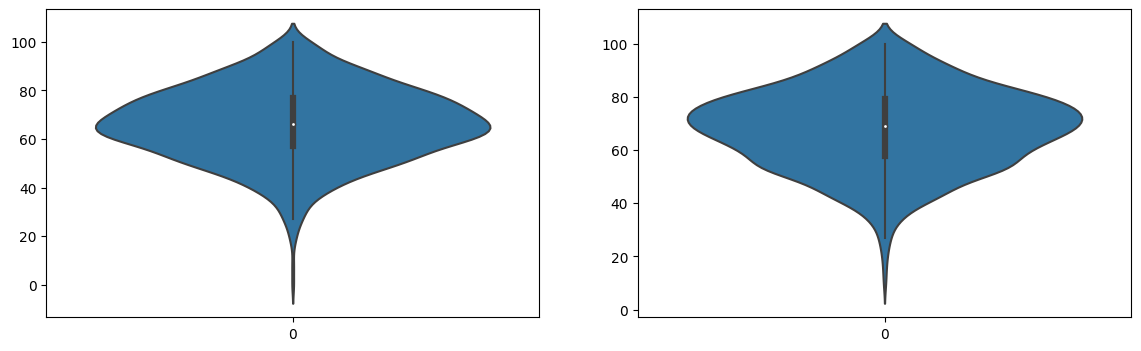

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.violinplot(df['math score'])
plt.subplot(1,2,2)
sns.violinplot(df['writing score'])
plt.show()

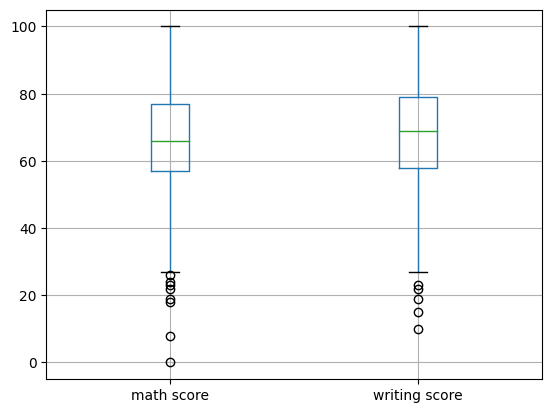

In [ ]:
df[['math score','writing score']].boxplot()
plt.show()

↑ Mengecek outlier pada kolom math score dan writing score

In [ ]:
math_grade = []
math = df['math score']
for i in math:
    if i<50:
        math_grade.append('E')
    elif i<65:
        math_grade.append('D')
    elif i<75:
        math_grade.append('C')
    elif i<85:
        math_grade.append('B')
    else:
        math_grade.append('A')
df['math grade'] = math_grade

writing_grade = []
writing = df['writing score']
for i in writing:
    if i<50:
        writing_grade.append('E')
    elif i<65:
        writing_grade.append('D')
    elif i<75:
        writing_grade.append('C')
    elif i<85:
        writing_grade.append('B')
    else:
        writing_grade.append('A')
df['writing grade'] = writing_grade

df.head()

,gender,test_preparation_course,math score,reading score,writing score,math grade,writing grade
0,female,none,72,72,74,C,C
1,female,completed,69,90,88,C,A
2,female,none,90,95,93,A,A
3,male,none,47,57,44,E,E
4,male,none,76,78,75,B,B


↑ Mengkategorisasikan kolom math score dan writing score dan tidak menghapusnya karena data tersebut masih relevan terhadap masalah yang akan dianalisa

**Handling Categorical Data**

In [ ]:
df.dtypes

gender                     object
test_preparation_course    object
math score                  int64
reading score               int64
writing score               int64
math grade                 object
writing grade              object
dtype: object

In [ ]:
categorical = ['gender', 'test_preparation_course', 'math grade', 'writing grade']

df_cpy = df.copy()
for col in categorical:
    df_cpy[col]=df_cpy[col].astype(str)

↑ Memastikan tipe data tetap string

#Data Scaling

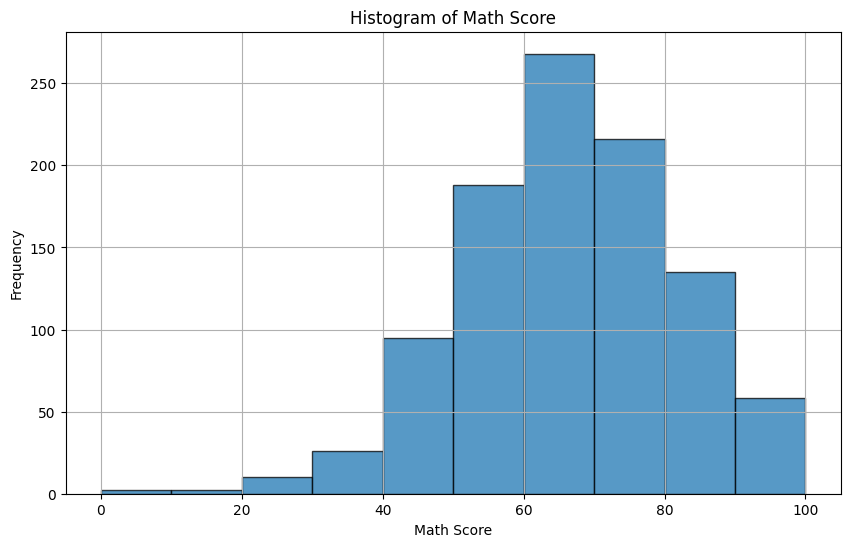

In [ ]:
# Plotting Histogram Math Score
plt.figure(figsize=(10, 6))
plt.hist(df['math score'], bins=10, alpha=0.75, edgecolor='black')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Histogram of Math Score')
plt.grid(True)
plt.show()

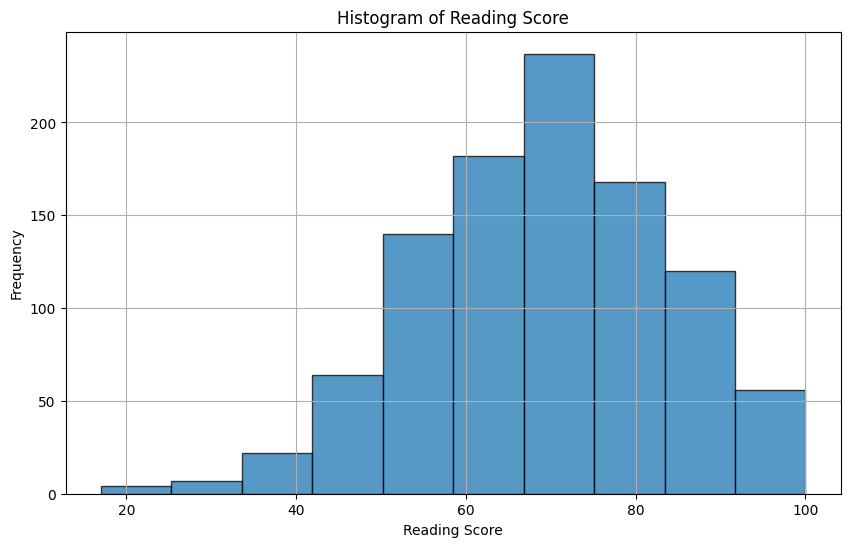

In [ ]:
# Plotting Histogram Reading Score
plt.figure(figsize=(10, 6))
plt.hist(df['reading score'], bins=10, alpha=0.75, edgecolor='black')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.title('Histogram of Reading Score')
plt.grid(True)
plt.show()

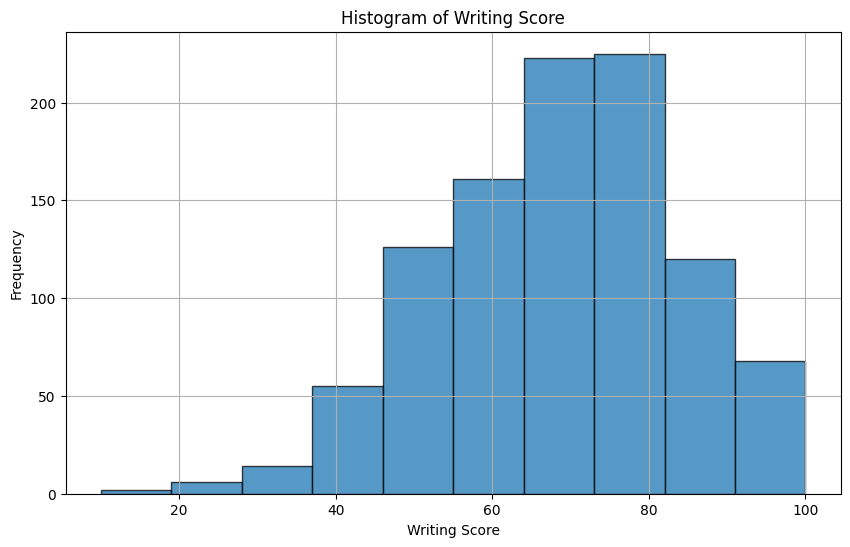

In [ ]:
# Plotting Histogram Writing Score
plt.figure(figsize=(10, 6))
plt.hist(df['writing score'], bins=10, alpha=0.75, edgecolor='black')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.title('Histogram of Writing Score')
plt.grid(True)
plt.show()

In [ ]:
# Konversi data menjadi dataframe
data = pd.DataFrame(df, columns=["gender", "test_preparation_course", "math score", "reading score", "writing score", "math grade", "writing grade"])

# Ambil kolom yang akan di-standardisasi
scores = data[["math score", "reading score", "writing score"]]

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Standardisasi skor
scaled_scores = scaler.fit_transform(scores)

# Konversi kembali ke dataframe
scaled_scores_df = pd.DataFrame(scaled_scores, columns=["math score", "reading score", "writing score"])

# Gabungkan hasil standardisasi dengan dataset awal
data[["math score", "reading score", "writing score"]] = scaled_scores_df

# Tampilkan hasil gabungan
print(data)

     gender test_preparation_course  math score  reading score  writing score  \
0    female                    none    0.390024       0.193999       0.391492   
1    female               completed    0.192076       1.427476       1.313269   
2    female                    none    1.577711       1.770109       1.642475   
3      male                    none   -1.259543      -0.833899      -1.583744   
4      male                    none    0.653954       0.605158       0.457333   
..      ...                     ...         ...            ...            ...   
995  female               completed    1.445746       2.044215       1.774157   
996    male                    none   -0.269803      -0.970952      -0.859491   
997  female               completed   -0.467751       0.125472      -0.201079   
998  female               completed    0.126093       0.605158       0.589015   
999  female                    none    0.719937       1.153370       1.181586   

    math grade writing grad

#IMBALANCE DATASET

In [ ]:
#OVERSAMPLE

import time
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Load the dataset
start_time = time.time()
load_time = time.time() - start_time

# Separate features (X) and target variable (y)
X = df.drop('test_preparation_course', axis=1)  # Replace 'test_preparation_course' with the actual column name
y = df['test_preparation_course']

# Initialize RandomOverSampler and resample the dataset
start_time = time.time()
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)
oversampling_time = time.time() - start_time

# Convert the resampled data to a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['test_preparation_course'] = y_resampled

# Calculate the differences in dataset size and class distribution
original_size = len(df)
oversampled_size = len(df_resampled)
class_distribution_diff = df_resampled['test_preparation_course'].value_counts() - df['test_preparation_course'].value_counts()

# Output the results
print(f"Original Dataset Size: {original_size}")
print(f"Oversampled Dataset Size: {oversampled_size}")
print(f"Class Distribution Difference:\n{class_distribution_diff}")
print(f"Loading Time: {load_time} seconds")
print(f"Oversampling Time: {oversampling_time} seconds")

Original Dataset Size: 1000
Oversampled Dataset Size: 1284
Class Distribution Difference:
none           0
completed    284
Name: test_preparation_course, dtype: int64
Loading Time: 0.00012946128845214844 seconds
Oversampling Time: 0.018877267837524414 seconds
